<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-1/02_plotting_probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plotting probabilities

Data plots are among the most valuable tools in any data scientist’s arsenal. Without
good visualizations, we are effectively crippled in our ability to glean insights from
our data. Fortunately, we have at our disposal the external Python Matplotlib
library, which is fully optimized for outputting high-caliber plots and data visualizations.


In this notebook, we use Matplotlib to better comprehend the coin-flip probabilities.

##Setup

In [ ]:
!wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-science-bookcamp/case-study-1/probabilities.py

In [2]:
import matplotlib.pyplot as plt

from probabilities import *

##Plotting Basic

The `plt.plot` method takes as input two iterables:
x and y. Calling `plt.plot(x, y)` prepares a 2D plot of x versus y; displaying the plot
requires a subsequent call to `plt.show()`.

Let’s assign our x to equal integers 0
through 10 and our y values to equal double the values of x.

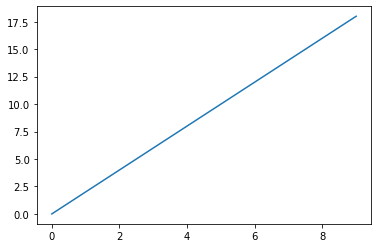

In [3]:
x = range(0, 10)
y = [2 * value for value in x]

plt.plot(x, y)
plt.show()

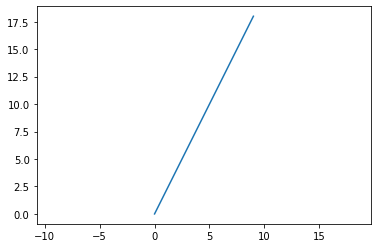

In [4]:
# We can equalize both axes by calling plt.axis('equal')
plt.plot(x, y)
plt.axis("equal")
plt.show()

However, this will lead to an awkward
visualization containing too much empty space.

If we prefer to visualize the 10 points individually, we can
do so using the `plt.scatter` method.

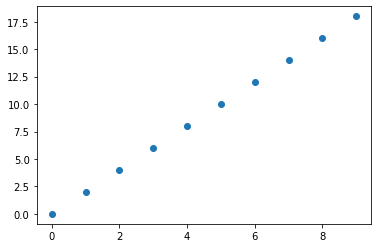

In [5]:
plt.scatter(x, y)
plt.show()

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this
by shading the area under the plotted curve over the specified interval, using the
`plt.fill_between` method.

The method takes as input both x and y and also a where
parameter, which defines the interval coverage. The input of the where parameter is a list
of Boolean values in which an element is True if the x value at the corresponding index
falls within the interval we specified.

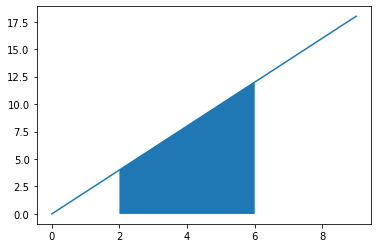

In [6]:
plt.plot(x, y)
where_condition = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where_condition)
plt.show()

Let’s execute all three methods in a single plot.

Doing so highlights an interval beneath a continuous line while also exposing individual coordinates.

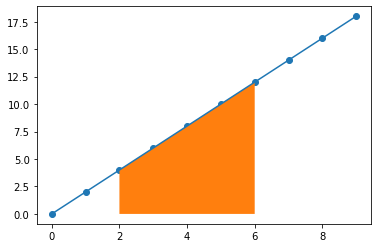

In [7]:
plt.plot(x, y)
plt.scatter(x, y)
plt.fill_between(x, y, where=where_condition)
plt.show()

No data plot is ever truly complete without descriptive x-axis and y-axis labels. Such
labels can be set using the `plt.xlabel` and `plt.ylabel` methods.

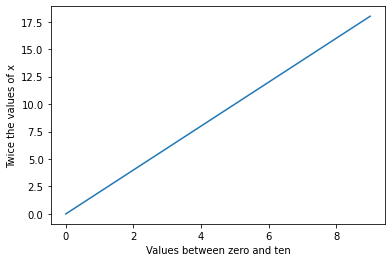

In [8]:
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")
plt.show()

##Plotting coin-flip probabilities

We examined the probability of seeing 80% or more
heads across a series of coin flips. That probability decreased as the coin-flip count
went up, and we wanted to know why.

Our aim is to compare the plotted data from both these dictionaries. We begin by
plotting the elements of `weighted_sample_space`: we plot its keys on the x-axis versus
the associated values on the y-axis.

In [12]:
weighted_sample_space = generate_coin_sample_space()

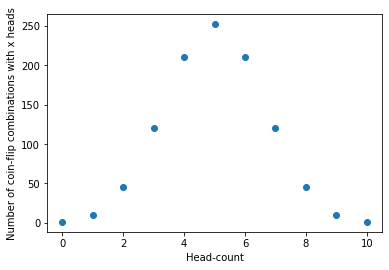

In [13]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]

plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Number of coin-flip combinations with x heads")
plt.show()

The visualized sample space takes on a symmetric shape. The symmetry is set around a
peak head count of 5. Therefore, head-count combinations closer to 5 occur more frequently
than those that are further from 5.

As we know, such frequencies correspond to probabilities. Thus, a head count is more probable if its value is closer to 5.

Let’s emphasize this by plotting the probabilities directly on the
y-axis.The probability plot will allow us to replace our lengthy y-axis label
with a more concisely stated 'Probability'.

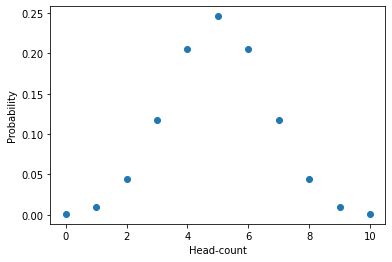

In [15]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]

plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Thus, just
by glancing at the plot, we can determine that the probability of observing five heads
is approximately 0.25. This mapping between x-values and probabilities is referred to
as a probability distribution. 

Probability distributions exhibit certain mathematically consistent
properties that make them useful for likelihood analysis.

For instance, consider
the x-values of any probability distribution: they correspond to all the possible values
of a random variable r. The probability that r falls within some interval is equal to the area beneath the probability curve over the span of that interval. 

Therefore, the total
area beneath a probability distribution always equals 1.0. This holds for any distribution,
including our head-count plot.



In [16]:
assert sum(prob_x_10_flips) == 1.0

The area beneath the head-count interval of 8 through 10 is equal to the probability
of observing eight heads or more.

Let’s visualize that area using the `plt.fill_between` method.

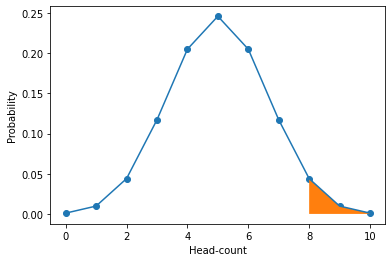

In [17]:
where_condition = [is_in_interval(value, 8, 10) for value in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_condition)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Now, let’s also shade the interval demarcating the probability of observing eight tails
or more.

Let's highlights the extremes along both tail ends of our probability
distribution.

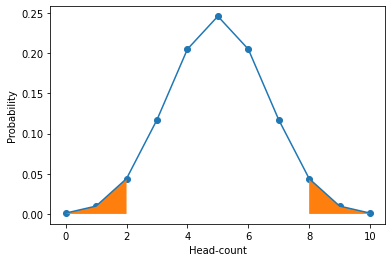

In [18]:
where_condition = [not is_in_interval(value, 3, 7) for value in x_10_flips]

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_condition)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

The two symmetrically shaded intervals cover the right and left tail ends of the coinflip
curve. Based on our previous analysis, we know that the probability of observing
more than seven heads or tails is approximately 10%. 

Therefore, each of the symmetrically
shaded tail segments should cover approximately 5% of the total area under
the curve.

##Comparing multiple coin-flip probability distributions